# Problem Statement


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import plotly.express as pl
warnings.filterwarnings('ignore')
import joblib


# Loading Data

In [2]:
df = pd.read_csv("oil.csv")
df.head()

,Date,Price,Open,High,Low,Volume,Che%
0,"Jan 09, 2020",59.56,59.99,60.31,58.66,750.93K,-0.08%
1,"Jan 08, 2020",59.61,62.84,65.65,59.15,1.21M,-4.93%
2,"Jan 07, 2020",62.70,62.91,63.15,62.11,582.65K,-0.90%
3,"Jan 06, 2020",63.27,63.71,64.72,62.64,724.24K,0.35%
4,"Jan 03, 2020",63.05,61.18,64.09,61.13,885.86K,3.06%


# Pre - processing

In [3]:
# Checking shape of the Data
df.shape
# In out dataset we 5000 rows and 7 columns

(5000, 7)

In [4]:
# Checking the Datatypes of the Data
df.info()
# In our dataset we have Three Datacolumns contain homogenous type of Data
# We will Convert them to there Proper Format
# So it will Help to perform EDA for mnore Insight.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5000 non-null   object 
 1   Price   5000 non-null   float64
 2   Open    5000 non-null   float64
 3   High    5000 non-null   float64
 4   Low     5000 non-null   float64
 5   Volume  5000 non-null   object 
 6   Che%    5000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.6+ KB


In [5]:
# Converting Date columns to datetime Datatype

df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Converting Volume column to Integer Datatype and multiplying with 1000 when there is K and by 1000000 when there is M

df['Volume'] = df['Volume'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval).astype(int)

In [7]:
# Replacing % with ' ' from Che% column and converting it into float datatype

df['Che%'] = df['Che%'].replace({'%':' '},regex=True).astype(float)

In [8]:
# Chenking the datatypes of again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5000 non-null   datetime64[ns]
 1   Price   5000 non-null   float64       
 2   Open    5000 non-null   float64       
 3   High    5000 non-null   float64       
 4   Low     5000 non-null   float64       
 5   Volume  5000 non-null   int32         
 6   Che%    5000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 254.0 KB


In [9]:
# Checking the Some Discreptive Statictical parameters

df.describe()

,Date,Price,Open,High,Low,Volume,Che%
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,2010-05-03 08:13:55.200000,62.599772,62.602976,63.505846,61.633106,2.698725e+05,0.041030
min,2000-05-31 00:00:00,17.450000,17.300000,18.250000,16.700000,0.000000e+00,-15.250000
25%,2005-06-06 18:00:00,43.245000,43.257500,44.230000,42.407500,9.160000e+04,-1.220000
50%,2010-05-24 12:00:00,59.335000,59.325000,60.065000,58.420000,2.272800e+05,0.080000
75%,2015-04-14 06:00:00,83.080000,82.985000,84.412500,81.722500,3.584200e+05,1.270000
max,2020-01-09 00:00:00,145.290000,145.190000,147.270000,143.220000,1.400000e+06,17.830000
std,NaN,25.895318,25.894581,26.139498,25.605439,2.192244e+05,2.349282


<Axes: >

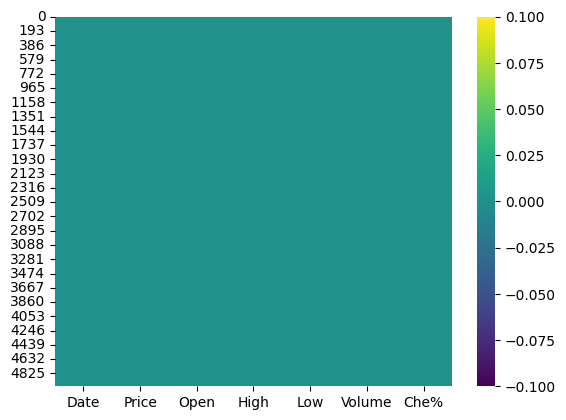

In [10]:
# Checking Null Values in the Data

df.isnull().sum()
sns.heatmap(df.isnull(),cmap='viridis')

# Looking to the Heatmap we can undersatnd that there is no Null Value Present in the Dataset 

<Axes: title={'center': 'Outlier Detection in Price Column'}>

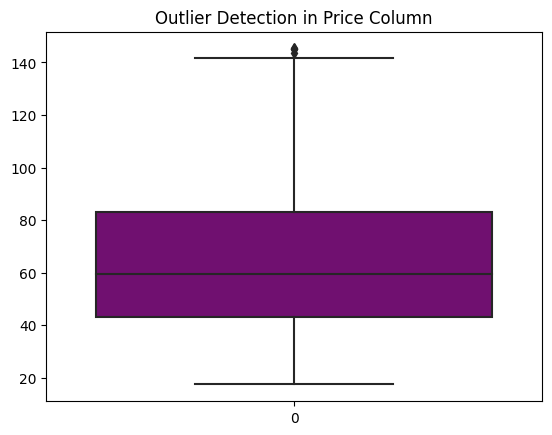

In [11]:
# Detecting Outlier
# So will Check the Outlier in Price Column beacaue it Target Variable and While Predecting Future Price of the Oil
# Wihtout Knowing Price of the Oil we cannot estimate the Low,High,Open and Volume of the data

plt.title('Outlier Detection in Price Column')
sns.boxplot(df['Price'],color='purple')

# Looking at the Boxplot of Price columns we can see there are few outlier above the upper limit of the price column
# Show we will exclude the Outlier

In [12]:
# Getting Upper Limit of the Price Column

upper_limit = (np.quantile(df['Price'],0.75) + 1.5*(np.quantile(df['Price'],0.75) - np.quantile(df['Price'],0.25)))
upper_limit

# Filtering the price Column with its Upper Limit by using condition 'price <= 142.83249999999998'

df = df[df['Price'] <= 142.83249999999998 ]
df.head()

,Date,Price,Open,High,Low,Volume,Che%
0,2020-01-09,59.56,59.99,60.31,58.66,750930,-0.08
1,2020-01-08,59.61,62.84,65.65,59.15,1210000,-4.93
2,2020-01-07,62.70,62.91,63.15,62.11,582650,-0.90
3,2020-01-06,63.27,63.71,64.72,62.64,724240,0.35
4,2020-01-03,63.05,61.18,64.09,61.13,885860,3.06


# Exploratory Data Analysis and Feature Engineering

Text(0.5, 1.0, 'Distribution of Che%')

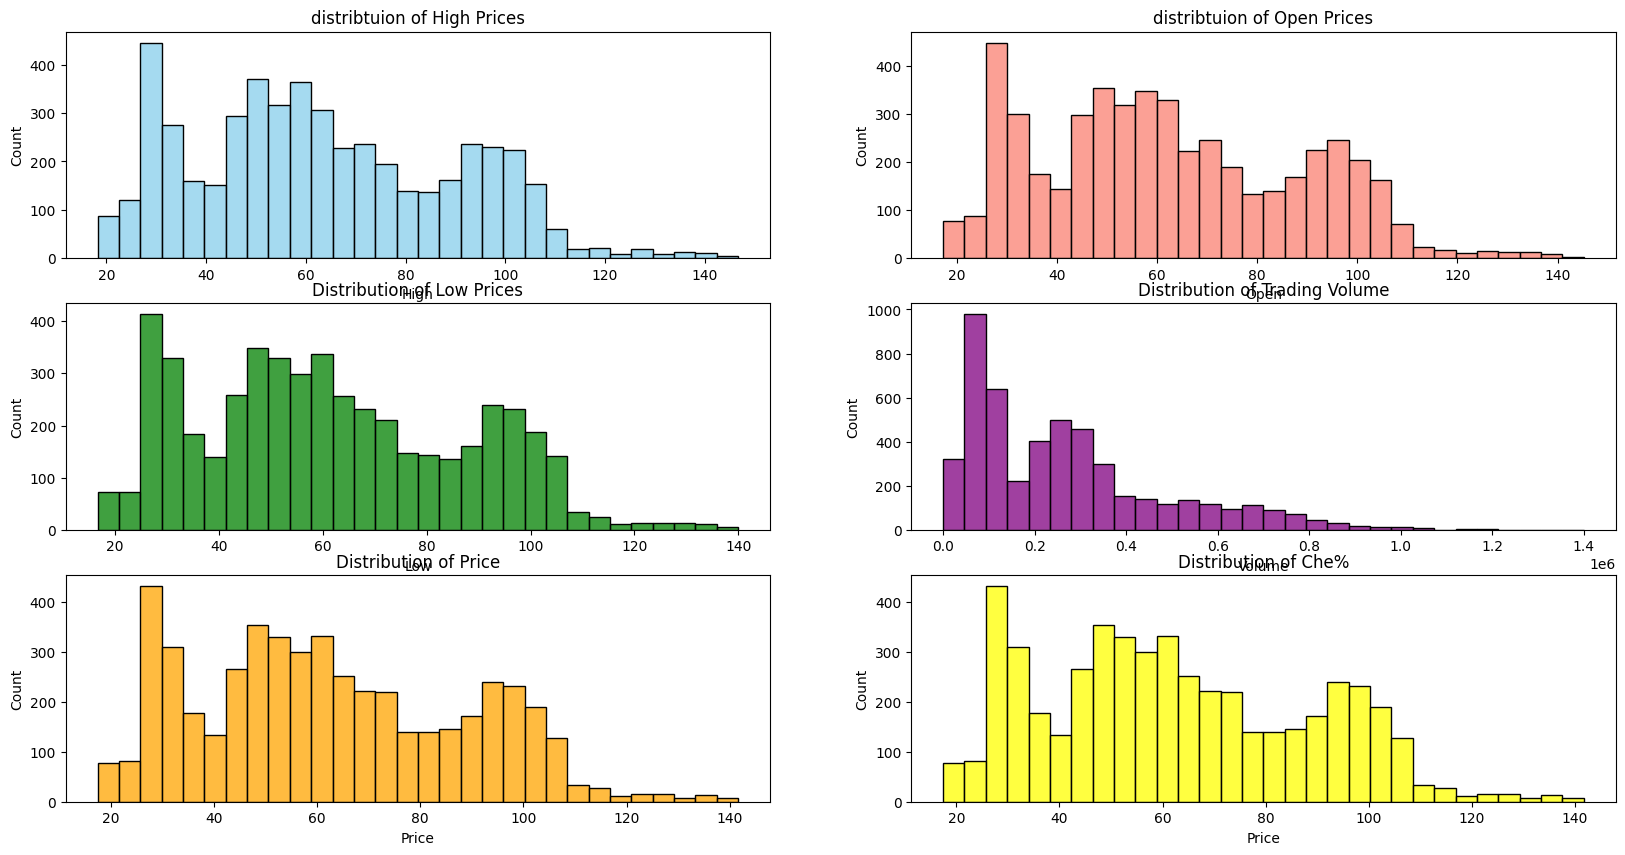

In [13]:
# Cheking the Distribution Each Column Using histogram 

plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
sns.histplot(df['High'],bins=30,color='skyblue')
plt.title('distribtuion of High Prices')

plt.subplot(3,2,2)
sns.histplot(df['Open'],bins=30,color='salmon')
plt.title('distribtuion of Open Prices')

plt.subplot(3,2,3)
sns.histplot(df['Low'],bins=30,color='green')
plt.title("Distribution of Low Prices")

plt.subplot(3,2,4)
sns.histplot(df['Volume'],bins=30,color='purple')
plt.title("Distribution of Trading Volume")

plt.subplot(3,2,5)
sns.histplot(df['Price'],bins=30,color='orange')
plt.title("Distribution of Price")

plt.subplot(3,2,6)
sns.histplot(df['Price'],bins=30,color='yellow')
plt.title("Distribution of Che%")


In [14]:
# Visualize of Price column According to Time Series
# From the Graph we understand In The month july 2008 Oil Price was maximum 145.18 and In month of January 2002 Oil price was Minimum 17.97
# In 2008 there Was Sudden Change in Oil price from 145.18 to 33.87 due to some crises
plt.figure(figsize=(14,4))
fig = pl.line(data_frame=df,x = df['Date'],y = df['Price'])
fig.show()

<Figure size 1400x400 with 0 Axes>

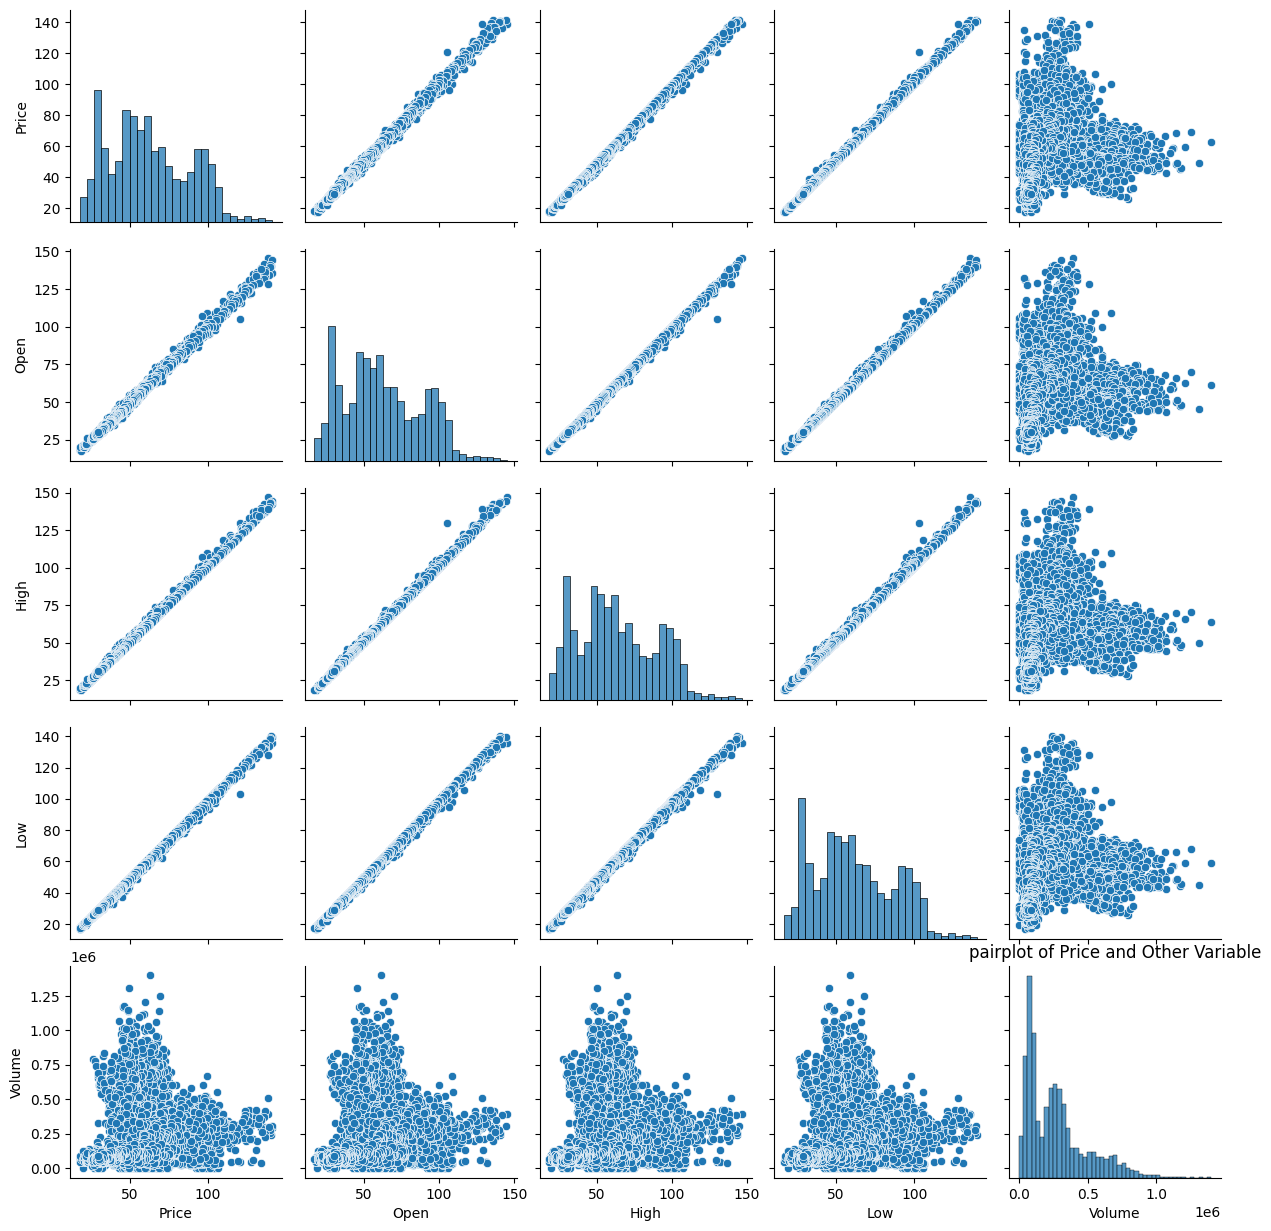

In [15]:
# Pairplot of Price with Selected columns

sns.pairplot(data=df[['Price','Open','High','Low','Volume']],palette='mist')
plt.title('pairplot of Price and Other Variable')
plt.show()

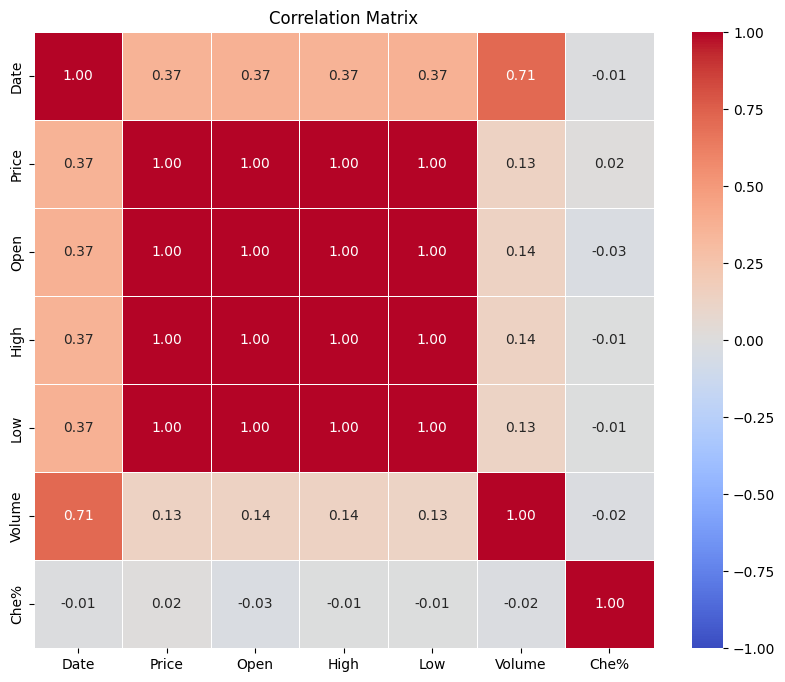

In [16]:
# Checking Correlation 

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.5,vmin=-1,vmax=1,fmt='0.2f')
plt.title("Correlation Matrix")
plt.show()

<Axes: xlabel='open - high', ylabel='Volume'>

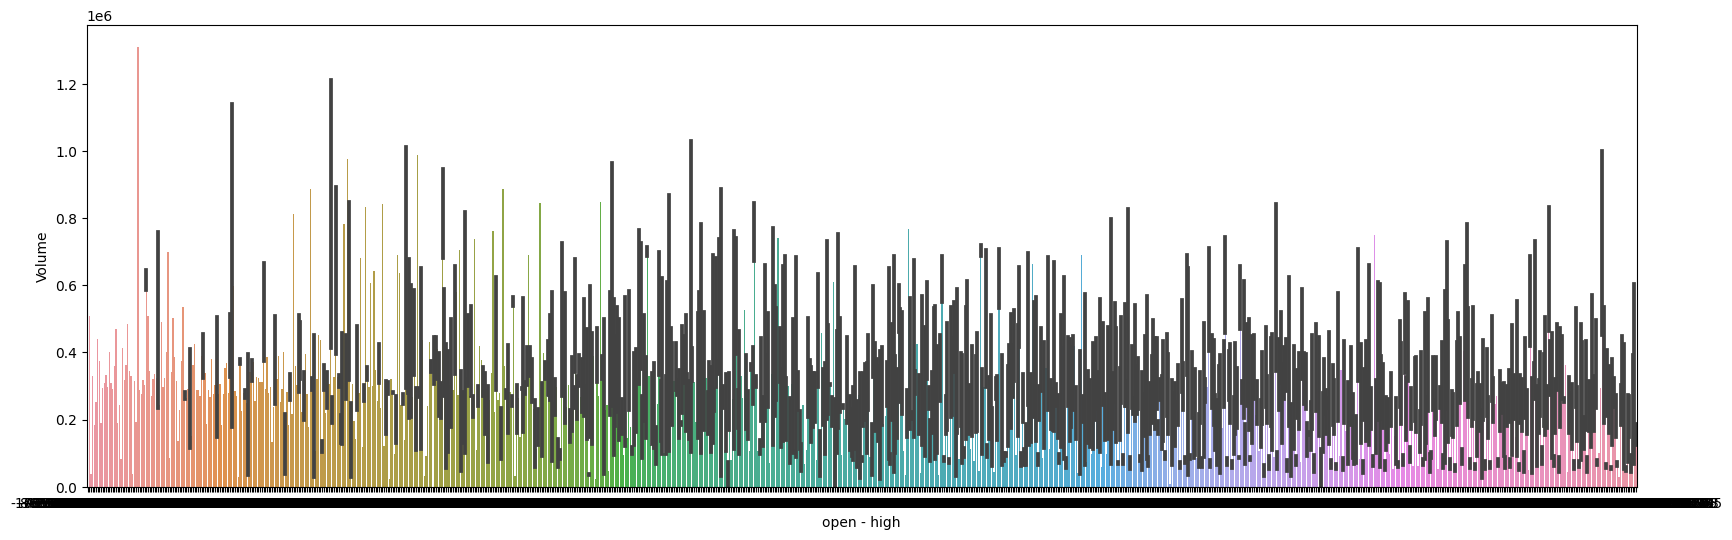

In [17]:
# Chenking How Volume get change as the difference Between Open Price and High price get Increase

df['open - high'] = df['Open'] - df['High']
plt.figure(figsize=(20,6))
sns.barplot(data=df,x = df['open - high'],y = df['Volume'])

# Looking at the Graph We can undestand as the Difference between Open and High Price increase  the Volume silghtly get changes.

<Axes: xlabel='High - Low', ylabel='Volume'>

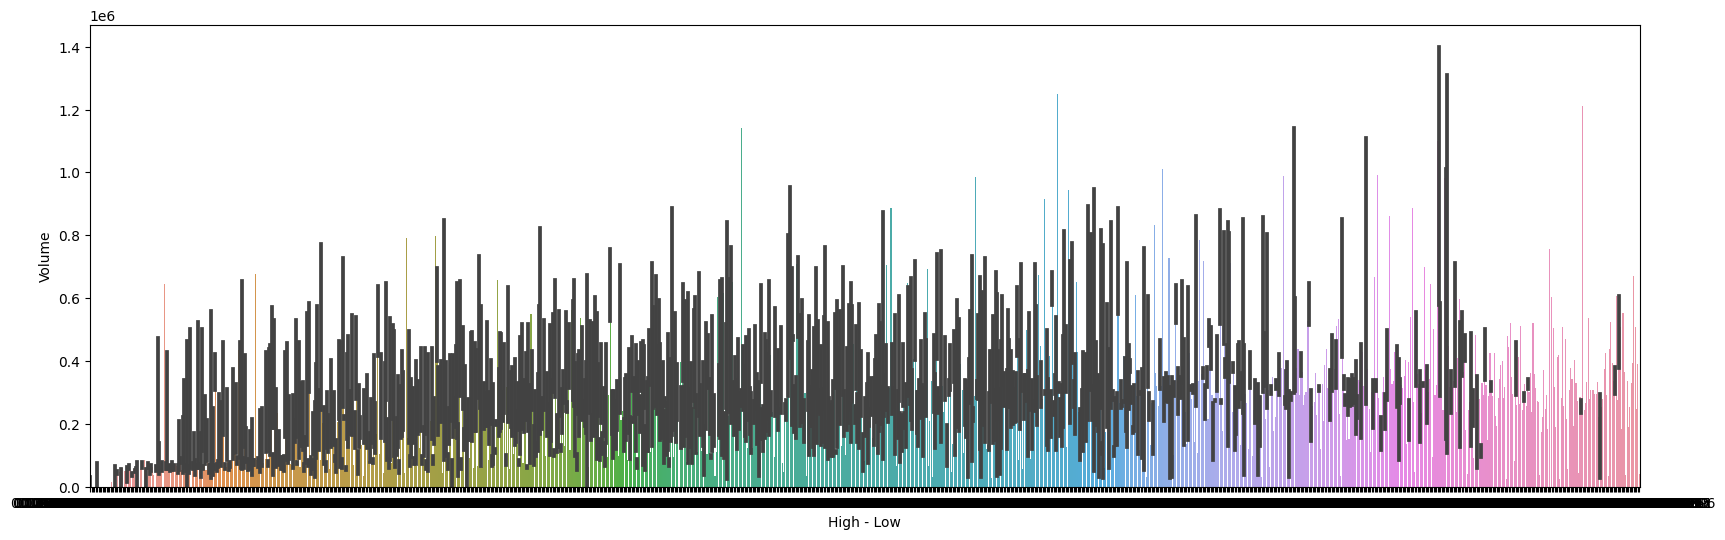

In [18]:
# Chenking How Volume get change as the difference Between High Price and Low price get Increase or Decrease

df['High - Low'] = df['High'] - df['Low']
plt.figure(figsize=(20,6))
sns.barplot(data=df,x = df['High - Low'],y = df['Volume'])

# Looking at the Graph We can undestand as the Difference between High and Low Price increase the Volume also get Increase.

In [19]:
# Performing Feature Engineering On Date column to Extract Year,Month.

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

Text(0, 0.5, 'Price')

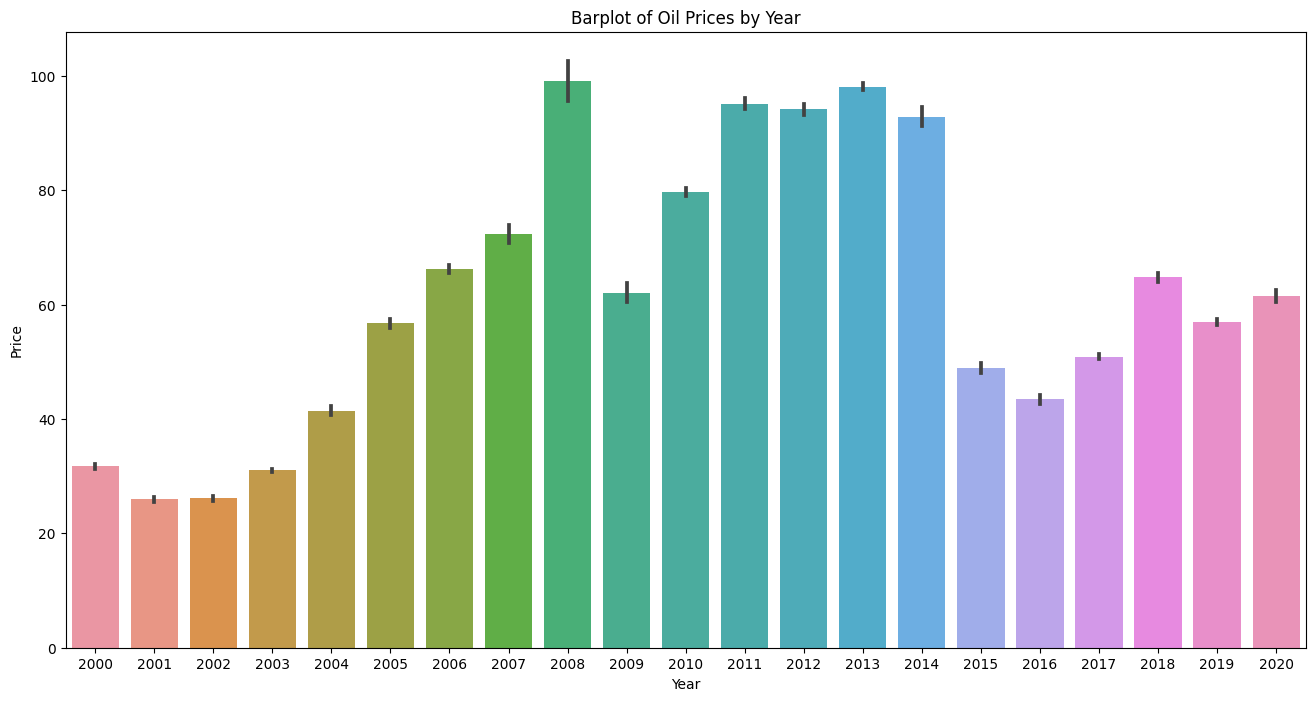

In [20]:
#  Bar Plot of Year wise Price of the Oil

plt.figure(figsize=(16,8))
sns.barplot(data=df ,x =df['Year'],y = df['Price'])
plt.title("Barplot of Oil Prices by Year")
plt.xlabel('Year')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

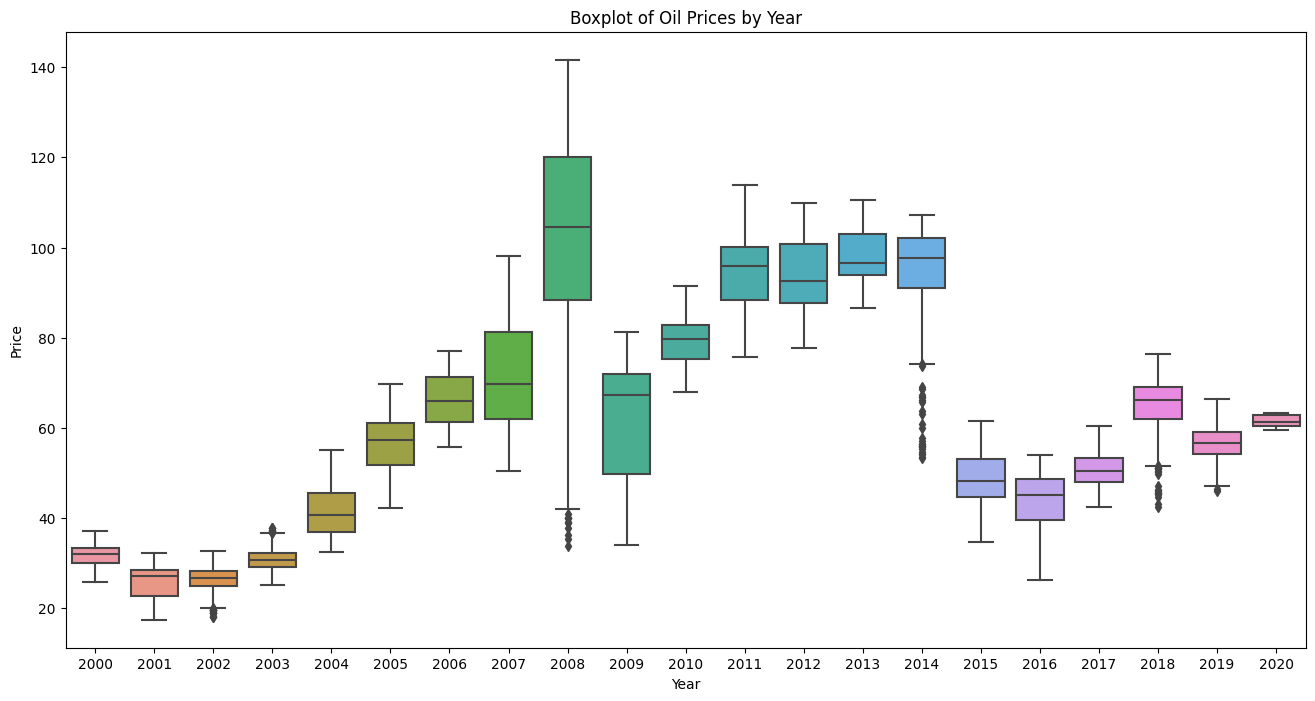

In [21]:
# Boxplot of Yearly Price

plt.figure(figsize=(16,8))
sns.boxplot(data=df ,x =df['Year'],y = df['Price'])
plt.title("Boxplot of Oil Prices by Year")
plt.xlabel('Year')
plt.ylabel('Price')


# Looking at the boxplot graph between Year and price
# In year 2008 Oil price achived maximum price above 140 barrel and there was maximum price changes in oil from 35 to 140 barrel
# In year 2001 Oil Achived Minimum price approximatley 18 per barrel
# In year 2003 there was Minimum Changes in the Oil Price 


In [22]:
# Price of Oil Monthly wise in Each Year
fig = pl.bar(df,x = df['Month'], y = df['Price'],color=df['Year'])
fig.update_layout(title = "Monthly Price of Oil in Each Year",
                  xaxis_title = 'Month',
                  yaxis_title = "Price")
fig.show()

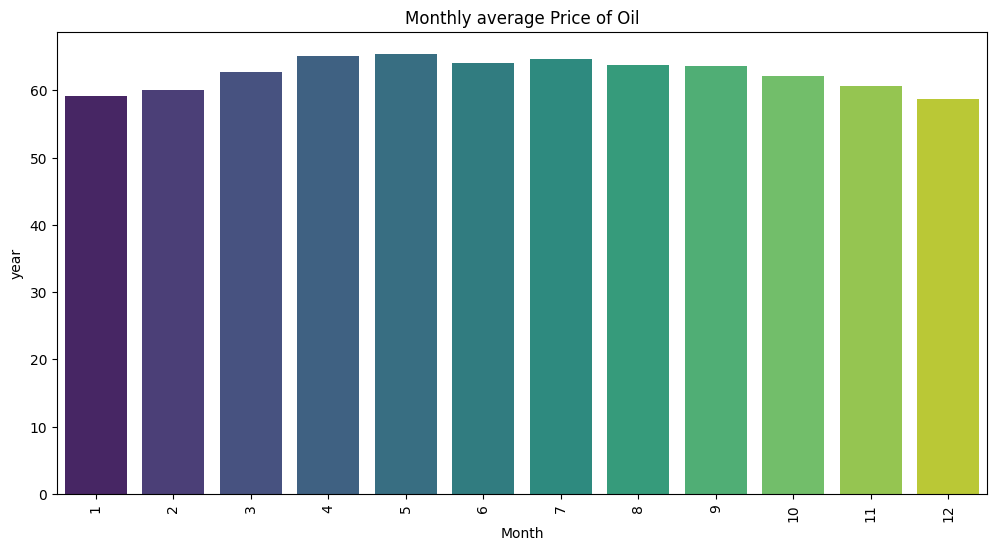

In [23]:
# Monthly Average of Oil Price

montly_average_price = df.groupby('Month')['Price'].mean()
plt.figure(figsize=(12,6))
sns.barplot(x = montly_average_price.index,y = montly_average_price.values,palette='viridis')
plt.title('Monthly average Price of Oil')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.ylabel('year')
plt.show()

# Looking at the graph we can understand May Month have maximum average Price above 65 and December Month have Minimum Average price as 58


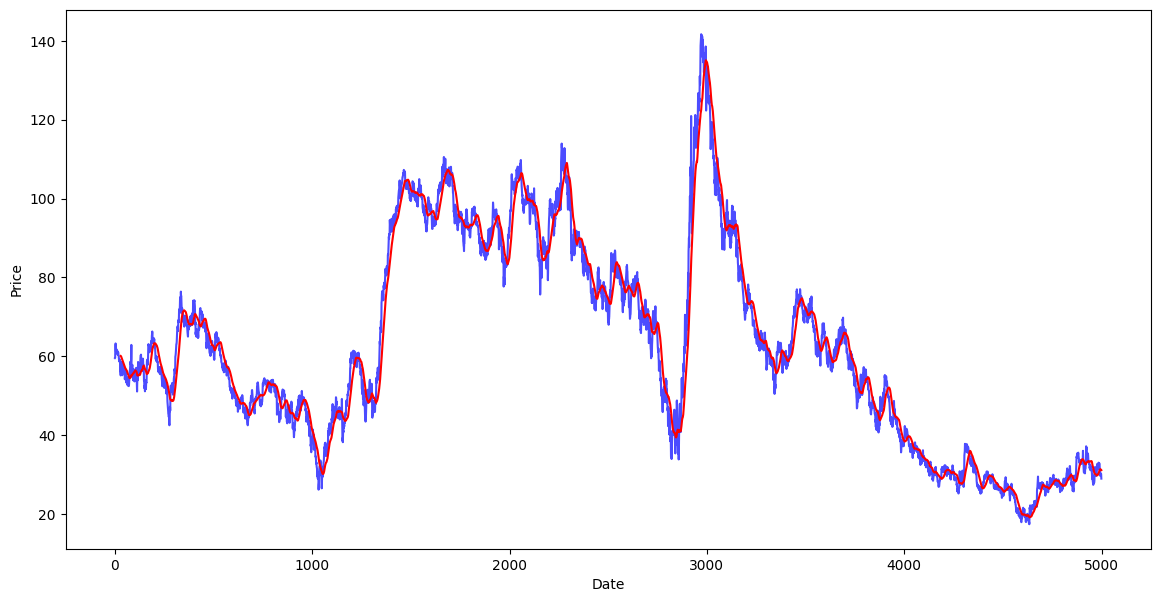

In [24]:
# Rolling Mean of Oil prices over Specific Window

rolling_window = 30
rolling_mean = df['Price'].rolling(window=rolling_window).mean()
plt.figure(figsize=(14,7))
plt.plot(df.index,df['Price'],label="Oil Price",color = 'blue',alpha = 0.7)
plt.plot(rolling_mean.index,rolling_mean,label = f'Rolling Window ({rolling_window} days)',color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

Text(0.5, 1.0, 'Residual Components')

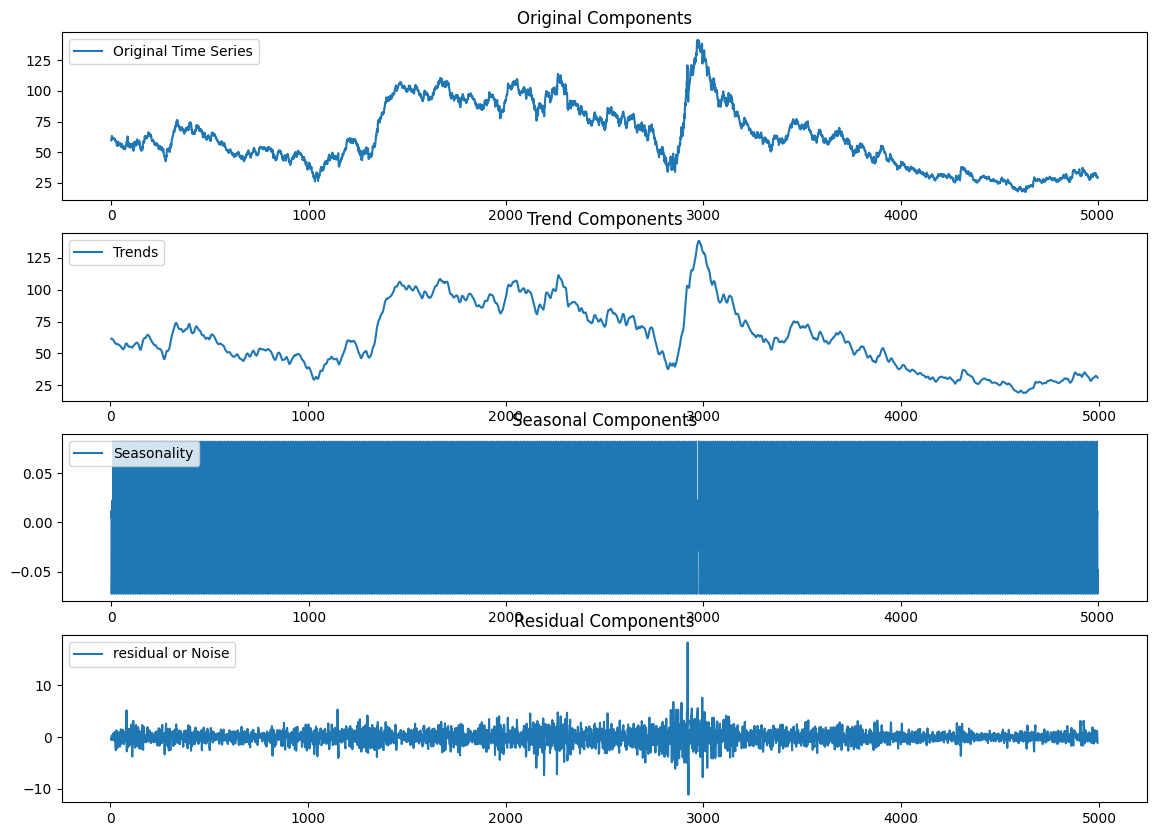

In [25]:
# Performing Seasonal_Decompose Plot on Price Column

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into components
# Assuming Seasonality for time series of 12 months
result = seasonal_decompose(df['Price'],model='additive',period=12)

plt.figure(figsize=(14,10))

plt.subplot(4,1,1)
plt.plot(df['Price'],label = 'Original Time Series')
plt.legend(loc='upper left')
plt.title('Original Components')

plt.subplot(4,1,2)
plt.plot(result.trend,label = 'Trends')
plt.legend(loc='upper left')
plt.title('Trend Components')

plt.subplot(4,1,3)
plt.plot(result.seasonal,label = 'Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Components')

plt.subplot(4,1,4)
plt.plot(result.resid,label = 'residual or Noise')
plt.legend(loc='upper left')
plt.title('Residual Components')

Text(0.5, 1.0, 'Residual Components')

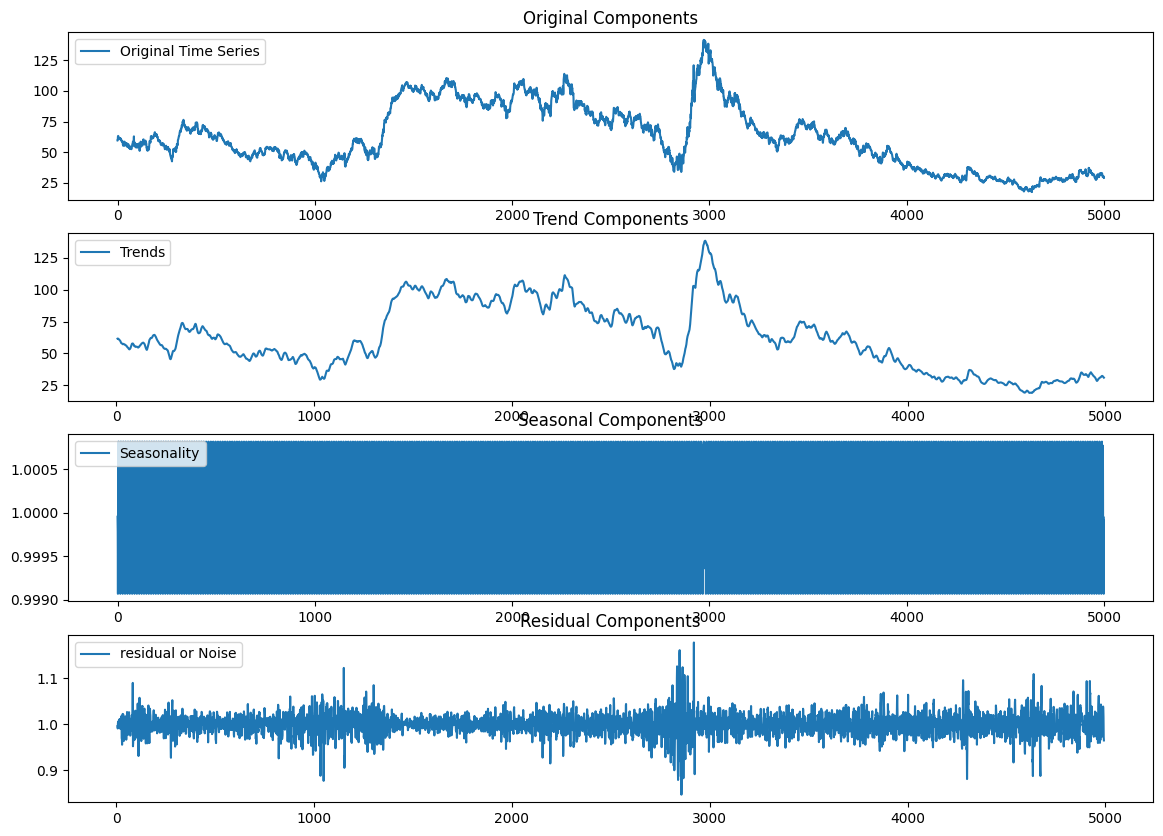

In [26]:
# Performing Seasonal_Decompose Plot on Price Column

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into components
# Assuming Seasonality for time series of 12 months
result = seasonal_decompose(df['Price'],model='multiplicative',period=12)

plt.figure(figsize=(14,10))

plt.subplot(4,1,1)
plt.plot(df['Price'],label = 'Original Time Series')
plt.legend(loc='upper left')
plt.title('Original Components')

plt.subplot(4,1,2)
plt.plot(result.trend,label = 'Trends')
plt.legend(loc='upper left')
plt.title('Trend Components')

plt.subplot(4,1,3)
plt.plot(result.seasonal,label = 'Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Components')

plt.subplot(4,1,4)
plt.plot(result.resid,label = 'residual or Noise')
plt.legend(loc='upper left')
plt.title('Residual Components')

        Date  Price   Open   High    Low   Volume  Che%  open - high  \
0 2020-01-09  59.56  59.99  60.31  58.66   750930 -0.08        -0.32   
1 2020-01-08  59.61  62.84  65.65  59.15  1210000 -4.93        -2.81   
2 2020-01-07  62.70  62.91  63.15  62.11   582650 -0.90        -0.24   
3 2020-01-06  63.27  63.71  64.72  62.64   724240  0.35        -1.01   
4 2020-01-03  63.05  61.18  64.09  61.13   885860  3.06        -2.91   

   High - Low  Year  Month  Daily_Price_Change  Rolling_Mean  Trend_Component  
0        1.65  2020      1                 NaN           NaN              NaN  
1        6.50  2020      1                0.05           NaN              NaN  
2        1.04  2020      1                3.09           NaN              NaN  
3        2.08  2020      1                0.57           NaN              NaN  
4        2.96  2020      1               -0.22           NaN              NaN  


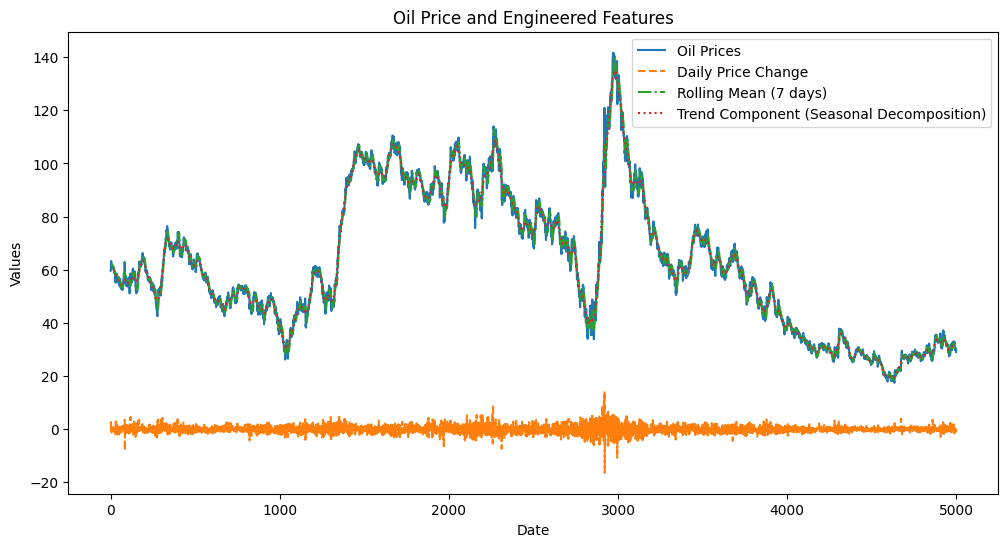

In [27]:
# Performing Feature Engineering On Price Column
df['Daily_Price_Change'] = df['Price'].diff()

# Feature Engineering: Rolling Mean
window_size = 7  # Adjust window size as needed
df['Rolling_Mean'] = df['Price'].rolling(window=window_size).mean()

# Feature Engineering: Seasonal Decomposition (Trend Component)
result = seasonal_decompose(df['Price'], model='additive', period=30)  # Adjust period as needed
df['Trend_Component'] = result.trend

# Display the first few rows of the dataframe after feature engineering
print(df.head())

# Visualize the new features
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Oil Prices')
plt.plot(df['Daily_Price_Change'], label='Daily Price Change', linestyle='--')
plt.plot(df['Rolling_Mean'], label=f'Rolling Mean ({window_size} days)', linestyle='-.')
plt.plot(df['Trend_Component'], label='Trend Component (Seasonal Decomposition)', linestyle=':')
plt.title('Oil Price and Engineered Features')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [28]:
# Data for Further Step to Perform Tests like Dickey-Fuller test and KPSS test to check the stationarity of the data

df1 = df.iloc[:,[0,1,9,10]]
df1.head()

,Date,Price,Year,Month
0,2020-01-09,59.56,2020,1
1,2020-01-08,59.61,2020,1
2,2020-01-07,62.70,2020,1
3,2020-01-06,63.27,2020,1
4,2020-01-03,63.05,2020,1


<Axes: >

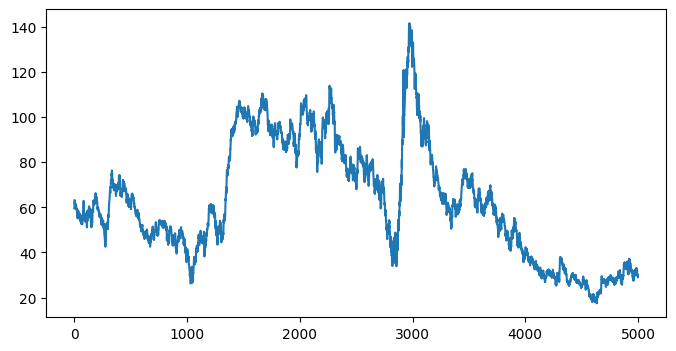

In [29]:
y = df['Price']
plt.figure(figsize=(8,4))
y.plot()

Looking at the grpah we ca see data is not in constant form
The trend is increasing year by year and get decrease at some interval
To make in statnary form we will perform Dickey_fuller_test.

In [30]:
# importing the library
from statsmodels.tsa.stattools import adfuller

In [31]:
#will use transformations to normalise 
y1 = y-y.shift(1)
y1 = y1[1:]  # ignoring 1st value as it is null value
y2 = np.log(y1-np.min(y1)+1)  # using log to ignore negative values

In [32]:
y2
# Looking at the Data we can see that Data is not in Stationary form.

1       2.857619
2       3.018472
3       2.887033
4       2.841998
5       2.740840
          ...   
4995    2.843164
4996    2.851862
4997    2.891482
4998    2.842581
4999    2.787477
Name: Price, Length: 4995, dtype: float64

In [33]:
result = adfuller(y)

In [34]:
print(f'test_statistic: {result[0]}')
print(f'p:value: {result[1]}')
print(f'critical value: {result[4]}')

if result[1] > 0.05:
    print('series is not stationary')
else:
    print('series is stationary')

test_statistic: -1.5675257281291874
p:value: 0.4998828000280018
critical value: {'1%': -3.4316611557350547, '5%': -2.862119388798601, '10%': -2.5670784094039782}
series is not stationary


# KPSS Test

The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test is another test to check for stationarity in a time series. 

In [35]:
#importing library
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings('ignore')

In [36]:
stats , p , lags , critical_value = kpss(df['Price'] , 'ct')

In [37]:
print(f'Test Statistic: {stats}')
print(f'p-value: {p}')
print(f'critical value: {critical_value}')

if p < 0.05 :
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistic: 1.8933469928084323
p-value: 0.01
critical value: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


In [38]:
# Using D parameter of ARIMA Model to check make data stationary
import pmdarima as pm
pm.arima.ndiffs(df['Price'] , alpha=0.05 , test='kpss' , max_d=4)

1

<Axes: >

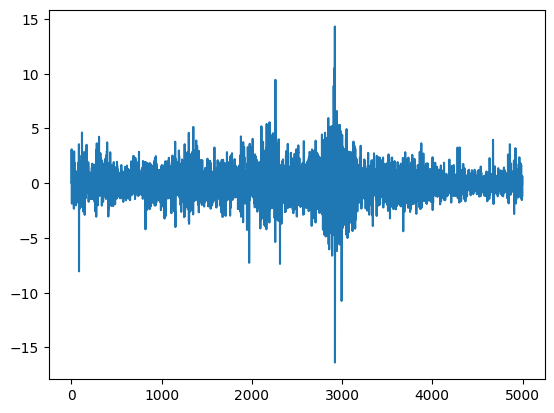

In [39]:
lag_g = df['Price'].rolling(window=2).apply(lambda x : x.iloc[1] - x.iloc[0]).dropna()
lag_g.plot()

In [40]:
pm.arima.ndiffs(lag_g , alpha=0.05 , test='kpss' , max_d=4)

0

In [41]:
result = adfuller(lag_g)

print(f'test_statistic: {result[0]}')
print(f'p:value: {result[1]}')
print(f'critical value: {result[4]}')

if result[1] > 0.05:
    print('series is not stationary')
else:
    print('series is stationary')

test_statistic: -32.0501037757323
p:value: 0.0
critical value: {'1%': -3.4316611557350547, '5%': -2.862119388798601, '10%': -2.5670784094039782}
series is stationary


# LSTM model

In [48]:
# Data for LSTM

df_lstm = df.iloc[:,0:2]
df_lstm.set_index('Date',inplace=True)
# Sort Index
df_lstm.sort_index(ascending=True, inplace=True)
df_lstm

,Price
Date,
2000-05-31,29.01
2000-06-01,30.14
2000-06-02,30.35
2000-06-05,29.70
2000-06-06,29.75
...,...
2020-01-03,63.05
2020-01-06,63.27
2020-01-07,62.70


In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_lstm)

In [50]:
train_size = int(len(df_scaled) * 0.70)
test_size = len(df_scaled) - train_size
train, test = df_scaled[0:train_size, :], df_scaled[train_size:len(df_scaled), :]

In [53]:
# convert an array of values into a data_set matrix def
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return np.array(data_x), np.array(data_y)

In [54]:
# Reshaping the data

look_back =90
X_train,Y_train,X_test,Ytest = [],[],[],[]
X_train,Y_train=create_data_set(train,look_back)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test,Y_test=create_data_set(test,look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [55]:
# create and fit the LSTM network regressor = Sequential() 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))


regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)
history =regressor.fit(X_train, Y_train, epochs = 20, batch_size = 15,validation_data=(X_test, Y_test), callbacks=[reduce_lr],shuffle=False)

Epoch 1/20
228/228 [==============================] - 42s 140ms/step - loss: 0.0056 - val_loss: 0.0594 - lr: 0.0010
Epoch 2/20
228/228 [==============================] - 30s 132ms/step - loss: 0.0135 - val_loss: 0.0824 - lr: 0.0010
Epoch 3/20
228/228 [==============================] - 31s 138ms/step - loss: 0.0178 - val_loss: 0.0994 - lr: 0.0010
Epoch 4/20
228/228 [==============================] - 31s 135ms/step - loss: 0.0159 - val_loss: 0.0646 - lr: 0.0010
Epoch 5/20
228/228 [==============================] - 30s 132ms/step - loss: 0.0056 - val_loss: 0.0112 - lr: 0.0010
Epoch 6/20
228/228 [==============================] - 30s 130ms/step - loss: 0.0025 - val_loss: 0.0078 - lr: 0.0010
Epoch 7/20
228/228 [==============================] - 30s 133ms/step - loss: 0.0018 - val_loss: 0.0030 - lr: 0.0010
Epoch 8/20
228/228 [==============================] - 31s 134ms/step - loss: 0.0016 - val_loss: 0.0024 - lr: 0.0010
Epoch 9/20
228/228 [==============================] - 30s 134ms/step - l

In [56]:
regressor.save("Lstm_model.h5")

In [57]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

44/44 [==============================] - 1s 21ms/step


In [59]:
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

Train Mean Absolute Error: 1.6963480567820128
Train Root Mean Squared Error: 2.352095160786106
Test Mean Absolute Error: 1.4039901531284502
Test Root Mean Squared Error: 1.796339016203474


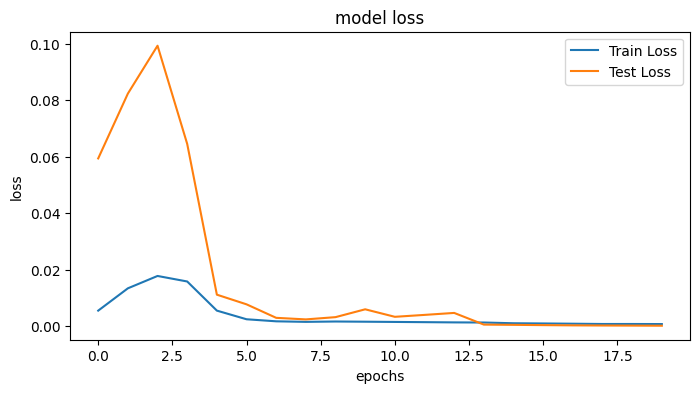

In [60]:
from sklearn.metrics import mean_absolute_error

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

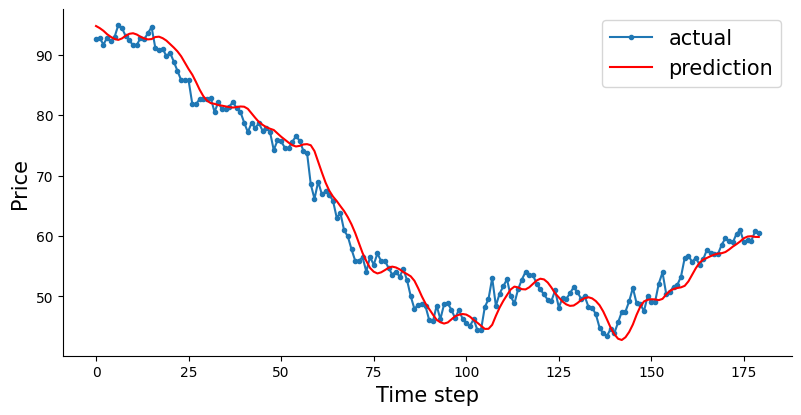

In [62]:
aa=[x for x in range(180)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:180], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:180], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

# Simple Rollling Average Model

In [63]:
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

In [64]:
def simple_rolling_average(data,window_size):
    return data['Price'].rolling(window=window_size).mean()

In [65]:
window = 7  # Adjust the window size as needed
train_data['SRA'] = simple_rolling_average(train_data, window)
test_data['SRA'] = simple_rolling_average(test_data, window)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Remove NaN values from test_data
test_data = test_data.dropna()

sma_mae = mean_absolute_error(test_data['Price'], test_data['SRA'])
sma_mse = mean_squared_error(test_data['Price'], test_data['SRA'])
sma_rmse = np.sqrt(sma_mse)

print("SRA Model Evaluation:")
print("MAE:", sma_mae)
print("MSE:", sma_mse)
print("RMSE:", sma_rmse)

SRA Model Evaluation:
MAE: 0.7296235225448708
MSE: 0.9346940964332618
RMSE: 0.9667957883820459


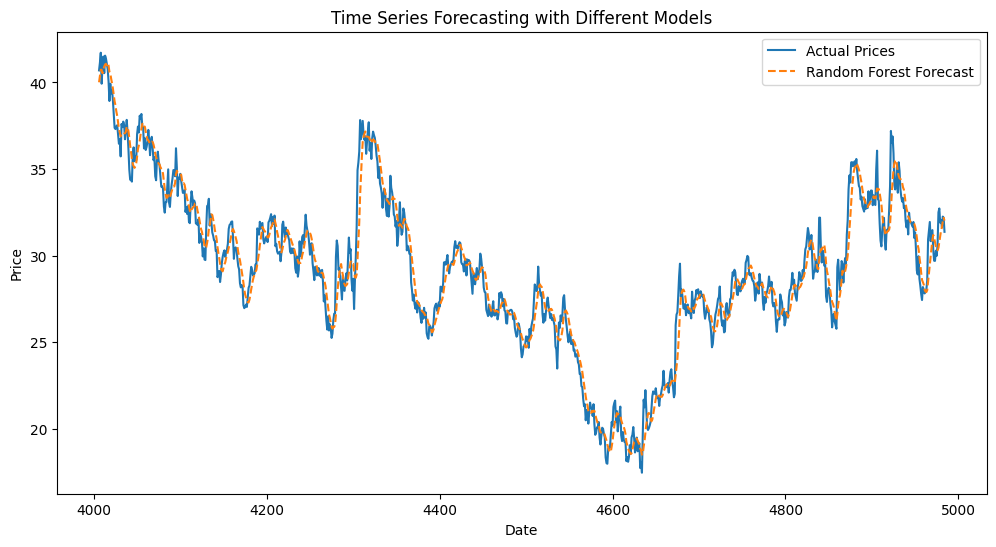

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Price'], label='Actual Prices')
plt.plot(test_data.index, test_data['SRA'], label='Random Forest Forecast', linestyle='dashed')
plt.title('Time Series Forecasting with Different Models')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2) Random Forest

In [68]:
# Data set for Random Forest model

df_rf = df.iloc[:,[0,1,5]]
df_rf.head()

,Date,Price,Volume
0,2020-01-09,59.56,750930
1,2020-01-08,59.61,1210000
2,2020-01-07,62.70,582650
3,2020-01-06,63.27,724240
4,2020-01-03,63.05,885860


In [69]:
df_rf['Year'] = df_rf['Date'].dt.year
df_rf['Month'] = df_rf['Date'].dt.month
df_rf['Day'] = df_rf['Date'].dt.day

In [70]:
features = ['Year', 'Month', 'Day', 'Volume']  # Features used for prediction
X = df_rf[features]
y = df_rf['Price']  # Target variable

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38, random_state=42)

In [72]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest model training

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators based on your dataset size
model_rf.fit(X_train, y_train)

# Model Evaluation
predictions = model_rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, predictions)
rf_mse = mean_squared_error(y_test,predictions)
print("Mean Absolute Error:", rf_mae)
print("mean_squared_error",rf_mse)
print("root mean squared Error",np.sqrt(rf_mse))

Mean Absolute Error: 1.446094418114797
mean_squared_error 4.206931330073717
root mean squared Error 2.051080527447354


In [ ]:
# Saving Model
import pickle
joblib.dump(model_rf, 'random_forest_model_save14.pkl')

['random_forest_model_save14.pkl']

# 3) XGB Regressor


In [73]:
df_xgb = df.iloc[:,[0,1,5]]
df_xgb.head()

,Date,Price,Volume
0,2020-01-09,59.56,750930
1,2020-01-08,59.61,1210000
2,2020-01-07,62.70,582650
3,2020-01-06,63.27,724240
4,2020-01-03,63.05,885860


In [74]:
df_xgb['Year'] = df_xgb['Date'].dt.year
df_xgb['Month'] = df_xgb['Date'].dt.month
df_xgb['Day'] = df_xgb['Date'].dt.day

In [75]:
# Feature Selection
features = ['Year', 'Month', 'Day', 'Volume']  # Features used for prediction
X = df_xgb[features]
y = df_xgb['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# XGBoost model training
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.05)  # You can adjust the hyperparameters based on your dataset
model.fit(X_train, y_train, 
          early_stopping_rounds=5, 
          eval_set=[(X_test, y_test)], 
          verbose=False)

# Model Evaluation
predictions_xg = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions_xg)
mse = mean_squared_error(y_test,predictions_xg)
print("Mean Absolute Error:", mae)
print("mean_squared_error",mse)
print("Root Mean Squared Error",np.sqrt(mse))

Mean Absolute Error: 1.8516460921478273
mean_squared_error 6.207730818797469
Root Mean Squared Error 2.491531821750922


# 4) Auto Regerssor

In [77]:
# AR Model
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(train_data['Price'], lags=31)  # Adjust 'lags' based on your data
ar_fit = ar_model.fit()
ar_pred = ar_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

In [78]:
test_data = test_data.dropna()
ar_mae = mean_absolute_error(test_data['Price'],ar_pred)
ar_mse = mean_squared_error(test_data['Price'], ar_pred)
ar_rmse = np.sqrt(ar_mse)

print("AR Model Evaluation:")
print("MAE:", ar_mae)
print("MSE:", ar_mse)
print("RMSE:", ar_rmse)

AR Model Evaluation:
MAE: 30.665724554367063
MSE: 1064.8738535326204
RMSE: 32.63240496090689


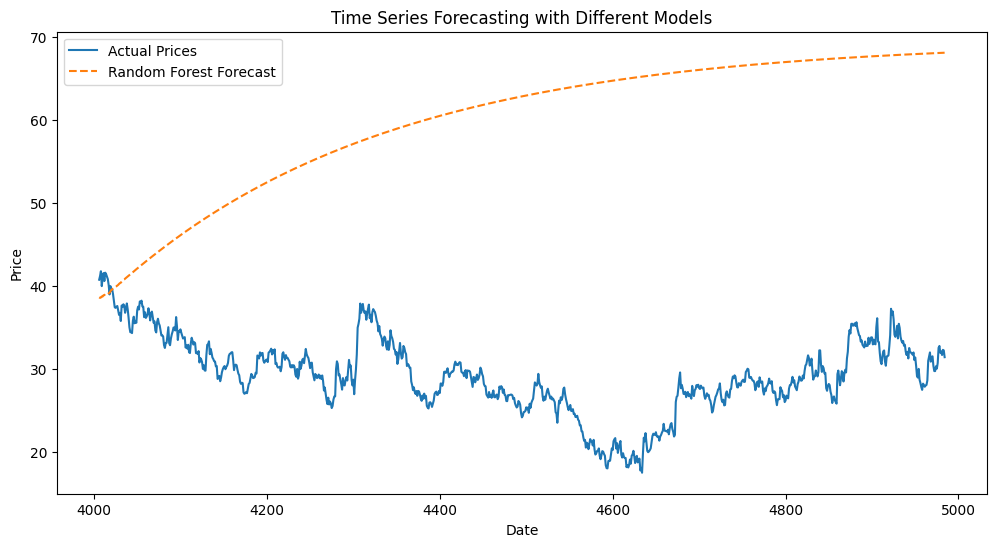

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Price'], label='Actual Prices')
plt.plot(test_data.index, ar_pred, label='Random Forest Forecast', linestyle='dashed')
plt.title('Time Series Forecasting with Different Models')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 5) SVC model

In [81]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_data[['Price']])
scaled_test = scaler.transform(test_data[['Price']])

In [82]:
model = SVR(kernel='rbf')  # Adjust the kernel as needed
model.fit(scaled_train, train_data['Price'])

SVR()

In [83]:
predictions = model.predict(scaled_test)

In [84]:
svr_mae = mean_absolute_error(test_data['Price'], predictions)
svr_mse = mean_squared_error(test_data['Price'], predictions)
svr_rmse = np.sqrt(svr_mse)

print("SVR Model Evaluation:")
print("MAE:", svr_mae)
print("MSE:", svr_mse)
print("RMSE:", svr_rmse)

SVR Model Evaluation:
MAE: 7.232439531324074
MSE: 91.95056604529513
RMSE: 9.589085777345781


# 6) ARIMA model

In [85]:
df_final = df.iloc[:,[0,1]]
df_final.dropna()
df_final.set_index('Date',inplace=True)

In [86]:
# Geting Best order for ARIMA model

from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

stepwise_fit = auto_arima(df_final['Price'],trace=True,suppress_warnings=True)
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17523.597, Time=1.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17547.187, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17533.574, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17532.675, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17545.282, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17533.479, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17532.837, Time=0.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=17525.147, Time=2.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=17525.169, Time=2.81 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17533.215, Time=0.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=17532.375, Time=1.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=17532.218, Time=0.81 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=17522.860, Time=2.46 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=17523.674, Time=2.28 sec
 ARIMA(3,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4996
Model:               SARIMAX(0, 1, 5)   Log Likelihood               -8753.256
Date:                Wed, 31 Jan 2024   AIC                          17518.512
Time:                        16:07:22   BIC                          17557.609
Sample:                             0   HQIC                         17532.216
                               - 4996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0562      0.007     -7.679      0.000      -0.071      -0.042
ma.L2         -0.0233      0.009     -2.514      0.012      -0.041      -0.005
ma.L3          0.0186      0.009      1.963      0.050     2.7e-05       0.037
ma.L4          0.0389      0.008      5.031      0.000       0.024       0.054
ma.L5         -0.0409      0.008     -4.961      0.000      -0.057      -0.025
sigma2         1.9482      0.020     96.012      0.000       1.908       1.988
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14895.68
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
# Train-Test Split
train_size = int(len(df_final) * 0.8)
train, test = df_final[:train_size], df_final[train_size:]

In [88]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train, order=(5,1,0))  # Adjust 'order' based on your data
arima_fit = arima_model.fit()
arima_pred = arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')


In [89]:
def evaluate_model(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    return mae, rmse
arima_mae, arima_rmse = evaluate_model(test['Price'], arima_pred)
print(arima_mae)
print(arima_rmse)

9.393547689824423
10.393839428283718


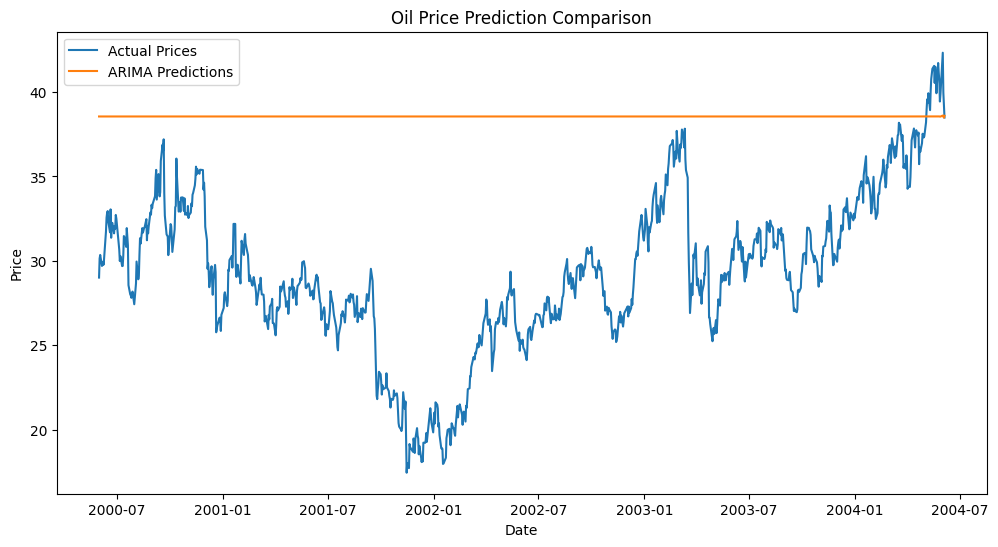

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Price'], label='Actual Prices')
plt.plot(test.index, arima_pred, label='ARIMA Predictions')
plt.title('Oil Price Prediction Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Best ARIMA Order: (2, 1, 2)
Best RMSE: 10.375244083363066


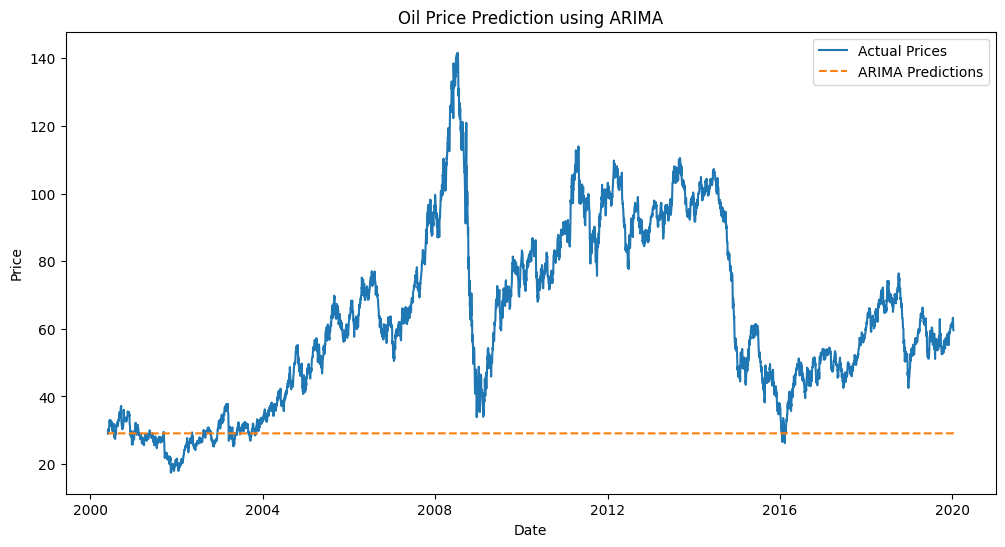

In [91]:
# Split the data into training and testing sets
train_size = int(len(df_final) * 0.8)
train, test = df_final[:train_size], df_final[train_size:]

# Define the range of values for p, d, and q
p_values = range(0, 3)  # Adjust the range based on your data and context
d_values = range(0, 2)
q_values = range(0, 3)

# Search through the parameter space
best_score, best_order = float("inf"), None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                # Fit ARIMA model
                arima_model = ARIMA(train, order=order)
                arima_fit = arima_model.fit()

                # Make predictions
                arima_predictions = arima_fit.forecast(steps=len(test))

                # Calculate RMSE
                rmse = np.sqrt(mean_squared_error(test, arima_predictions))

                # Update best parameters if needed
                if rmse < best_score:
                    best_score, best_order = rmse, order

            except Exception as e:
                continue

# Print the best parameters
print(f"Best ARIMA Order: {best_order}")
print(f"Best RMSE: {best_score}")

# Fit the final model with the best parameters
final_arima_model = ARIMA(df_final['Price'], order=best_order)
final_arima_fit = final_arima_model.fit()

# Make predictions for the entire dataset
final_arima_predictions = final_arima_fit.forecast(steps=len(df_final))

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df_final.index, df_final['Price'], label='Actual Prices')
plt.plot(df_final.index, final_arima_predictions, label='ARIMA Predictions', linestyle='dashed')
plt.title('Oil Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model Evaluation

In [92]:
# Random Forest
print("Mean Absolute Error:", rf_mae)
print("mean_squared_error",rf_mse)
print("root mean squared Error",np.sqrt(rf_mse))

#  AUto Regressor
print("AR Model Evaluation:")
print("MAE:", ar_mae)
print("MSE:", ar_mse)
print("RMSE:", ar_rmse)

# Support Vector Classifier
print("SVR Model Evaluation:")
print("MAE:", svr_mae)
print("MSE:", svr_mse)
print("RMSE:", svr_rmse)

# XGBRegressor
print("XGBRegresso Model")
print("Mean Absolute Error:", mae)
print("mean_squared_error",mse)
print("Root Mean Squared Error",np.sqrt(mse))

# ARIMA model Without Hyperparameter
print('ARIMA model Without Hyperparameter')
print(arima_mae)
print(arima_rmse)

# ARIMA After Hyperparameter
print("ARIMA model after Hyperparameter")
print(f"Best RMSE: {best_score}")






Mean Absolute Error: 1.446094418114797
mean_squared_error 4.206931330073717
root mean squared Error 2.051080527447354
AR Model Evaluation:
MAE: 30.665724554367063
MSE: 1064.8738535326204
RMSE: 32.63240496090689
SVR Model Evaluation:
MAE: 7.232439531324074
MSE: 91.95056604529513
RMSE: 9.589085777345781
XGBRegresso Model
Mean Absolute Error: 1.8516460921478273
mean_squared_error 6.207730818797469
Root Mean Squared Error 2.491531821750922
ARIMA model Without Hyperparameter
9.393547689824423
10.393839428283718
ARIMA model after Hyperparameter
Best RMSE: 10.375244083363066


From Checking Above Value we Will Use Random Forest
because Random Forest Gives least Error and ARIMA model as it is Time Series model gives less Error as compared to other time Sereis Model


# Saving Model Using Joblib

In [ ]:
# Saving Random Forestl

#joblib.dump(model_rf, 'random_forest_model_save14.pkl')

# SAving ARIMA Model

#joblib.dump(final_arima_fit,"Arima_final_model.pkl")


['Arima_final_model.pkl']